In [1]:
# pip install gym==0.17.3 #this is run once and then was commented

In [2]:
# pip install pyglet==1.5.0 ##this is run once and then was commented

In [3]:
import numpy as np
import gym
# import gymnasium as gym
import random

<p><span style="color: #ffff99;">To check which version of a given Python package is installed</span></p>

In [4]:
!pip show gym

Name: gym
Version: 0.17.3
Summary: The OpenAI Gym: A toolkit for developing and comparing your reinforcement learning agents.
Home-page: https://github.com/openai/gym
Author: OpenAI
Author-email: gym@openai.com
License: 
Location: c:\users\mahdi\anaconda3\lib\site-packages
Requires: cloudpickle, numpy, pyglet, scipy
Required-by: 


<p><span style="color: #ffff99;">All development of Gym has been moved to Gymnasium</span></p>

In [5]:
!pip show gymnasium

Name: gymnasium
Version: 0.29.0
Summary: A standard API for reinforcement learning and a diverse set of reference environments (formerly Gym).
Home-page: 
Author: 
Author-email: Farama Foundation <contact@farama.org>
License: MIT License
Location: c:\users\mahdi\anaconda3\lib\site-packages
Requires: cloudpickle, farama-notifications, numpy, typing-extensions
Required-by: 


<h3><span style="color: #ffcc99;">Creating the environment:</span></h3>
<ul>
<li><span style="color: #ccffff;">It's a&nbsp;<strong>5x5 grid world</strong></span></li>
<li><span style="color: #ccffff;">Our taxi is spawned&nbsp;<strong>randomly</strong>&nbsp;in a square.</span></li>
<li><span style="color: #ccffff;">The passenger is&nbsp;<strong>spawned randomly in one of the 4 possible locations</strong>&nbsp;(R, B, G, Y) and wishes to go in one of the&nbsp;<strong>4 possibles locations too</strong>.</span></li>
<li>
<h3><span style="color: #ffff99;">The reward system:</span></h3>
<ul>
<li><span style="color: #ccffff;">-1 for each timestep</span></li>
<li><span style="color: #ccffff;">+20 for successfully deliver the passenger</span></li>
<li><span style="color: #ccffff;">-10 for illegal actions (pickup or putdown the passenger at the outside of the destination).</span></li>
</ul>
</li>
</ul>

env.render:Compute the render frames as specified by render_mode during the initialization of the environment

In [6]:
# !pip install gymnasium[toy-text]

In [7]:
# env=gym.make("Taxi-v3", render_mode="rgb_array")
# env=gym.make("Taxi-v3", render_mode="human")

# create Taxi environment
env=gym.make("Taxi-v3")


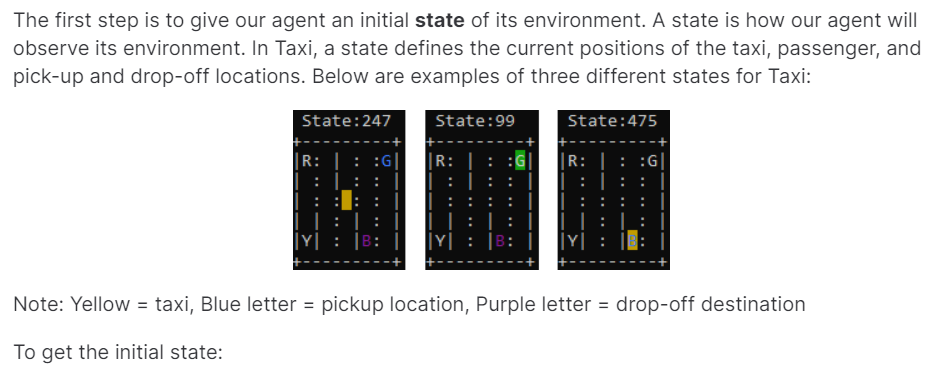

In [15]:
# create a new instance of taxi, and get the initial state
state = env.reset()
print(state)

493


therefore state is a number

<p><span style="color: #ccffff;">Note: Yellow = taxi, Blue letter = pickup location, Purple letter = drop-off destination</span></p>

In [9]:
# # sample a random action from the list of available actions
# action = env.action_space.sample()

# # perform this action on the environment
# env.step(action)

# print the new state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



<p><span style="color: #ff99cc;">Next, we'll run a for-loop to cycle through the game. At each iteration, our agent will: Make a random action from the action space (0 - south, 1 - north, 2 - east, 3 - west, 4 - pick-up, 5 - drop-off) Receive the new state</span></p>

In [10]:
num_steps = 20
for s in range(num_steps+1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    env.step(action)

    # print the new state
    env.render()

# end this instance of the taxi environment
env.close()

step: 0 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
step: 1 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
step: 2 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
step: 3 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
step: 4 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
step: 5 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
step: 6 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
step: 7 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
step: 8 out of 20
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+--------

<div class="text-cell-section-header">
<h2><span style="color: #ffff99;">Step 2: Create the Q-table and initialize it 🗄️</span></h2>
</div>
<ul>
<li><span style="color: #ffff99;">Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need to know the&nbsp;<strong>action_space and the observation_space</strong>.</span></li>
<li><span style="color: #ffff99;">OpenAI Gym provides us a way to do that:&nbsp;<code>env.action_space.n</code>&nbsp;and&nbsp;<code>env.observation_space.n</code></span></li>
</ul>

<p><span style="color: #ffcc99;">There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations</span></p>

<p><span style="color: #99ccff;">There are 6 discrete deterministic actions:</span></p>
<ul class="simple">
<li>
<p><span style="color: #99ccff;">0: move south</span></p>
</li>
<li>
<p><span style="color: #99ccff;">1: move north</span></p>
</li>
<li>
<p><span style="color: #99ccff;">2: move east</span></p>
</li>
<li>
<p><span style="color: #99ccff;">3: move west</span></p>
</li>
<li>
<p><span style="color: #99ccff;">4: pickup passenger</span></p>
</li>
<li>
<p><span style="color: #99ccff;">5: drop off passenger</span></p>
</li>
</ul>

In [11]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  500  possible states
There are  6  possible actions


In [12]:
# Create our Q table with state_size rows and action_size columns (500x6)
Q = np.zeros((state_space, action_space))
print(Q)
print(Q.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(500, 6)


<h2><span style="color: #ff9900;">Defining the hyperparameters ⚙️</span></h2>

In [13]:
total_episodes = 25000        # Total number of training episodes
total_test_episodes = 10      # Total number of test episodes
max_steps = 200               # Max steps per episode

learning_rate = 0.01          # Learning rate
gamma = 0.99                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001           # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

<div class="text-cell-section-header">
<h2><span style="color: #00ffff;">Defining the epsilon-greedy policy 🤖</span></h2>
</div>
<p><span style="color: #00ffff;">Epsilon-Greedy is a policy that handles the exploration/<a style="color: #00ffff;" href="https://medium.com/@thomassimonini/an-introduction-to-deep-reinforcement-learning-17a565999c0c?source=friends_link&amp;sk=1b1121ae5d9814a09ca38b47abc7dc61" target="_blank" rel="nofollow noopener">exploitation trade-off</a>.</span></p>
<h3><span style="color: #00ffff;">The idea</span></h3>
<p><span style="color: #00ffff;">Epsilon Greedy:</span></p>
<ul>
<li>
<p><span style="color: #00ffff;"><em>With probability 1 - ɛ</em>&nbsp;: we do&nbsp;<strong>exploitation</strong>&nbsp;(aka our agent selects the action with the highest state-action pair value).</span></p>
</li>
<li>
<p><span style="color: #00ffff;"><em>With probability ɛ</em>: we do&nbsp;<strong>exploration</strong>&nbsp;(trying random action).</span></p>
</li>
</ul>
<p><span style="color: #00ffff;">And as the training goes,&nbsp;<strong>we progressively reduce the epsilon value</strong>&nbsp;since we will&nbsp;<strong>need less exploration and more exploitation</strong>.</span></p>

In [14]:
def epsilon_greedy_policy(Q, state):
  # if random number > greater than epsilon --> exploitation
  if(random.uniform(0,1) > epsilon):
    action = np.argmax(Q[state])  #Q[state] returnes a row consisting of available actions values for that state
  # else --> exploration
  else:
    action = env.action_space.sample()  #actions are numbers 0~5
  
  return action

<div class="text-cell-section-header">
<h2><span style="color: #cc99ff;">Defining the Q-Learning algorithm and train our agent 🧠</span></h2>
</div>

In [16]:
 for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    for step in range(max_steps):
        #
        action = epsilon_greedy_policy(Q, state)

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state][action] = Q[state][action] + learning_rate * (reward + gamma * 
                                    np.max(Q[new_state]) - Q[state][action])      
        # If done : finish episode
        if done == True: 
            break
        
        # Our new state is state
        state = new_state

<h3><span style="color: #ffff99;">10 times test to watch how the agent drives</span></h3>

In [17]:
import time
rewards = []

frames = []
for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)
    for step in range(max_steps):
        env.render()     
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state][:])
        new_state, reward, done, info = env.step(action)
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
********

In [18]:
Q

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.32183125e+00, -3.31365075e+00, -3.31707027e+00,
        -3.31343776e+00,  9.62186150e+00, -3.36716704e+00],
       [-1.64635020e+00, -1.50001656e+00, -1.64261252e+00,
        -1.63595868e+00,  1.41187697e+01, -1.67802623e+00],
       ...,
       [-7.37207181e-01, -6.86110678e-01, -7.37082783e-01,
        -7.46024346e-01, -7.81134370e-01, -7.99720056e-01],
       [-2.18548194e+00, -2.18668492e+00, -2.18538605e+00,
        -2.18686971e+00, -2.27474779e+00, -2.19024278e+00],
       [-2.97010000e-02, -1.00000000e-02, -1.99000000e-02,
         1.50155702e-01, -1.00000000e-01, -1.00000000e-01]])